In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
default_dir = "/content/gdrive/My Drive"
df_train = pd.read_csv(os.path.join(default_dir,"train.csv")) # 학습용 데이터
df_test = pd.read_csv(os.path.join(default_dir,"submission.csv")) # 테스트 데이터(제출파일의 데이터)

# Expected_timeline
- 고객의 처리한 요청 일정
- 결측치 비율 : 0.520464
- 재범주화
  - less than 3 months
  - more than a year
  - 6 months ~ 9 months
  - 3 months ~ 6 months
  - 9 months ~ 1 year


In [4]:
df_test['expected_timeline'].value_counts(dropna = False)

NaN                    2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: expected_timeline, dtype: int64

In [5]:
df_train['expected_timeline'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                30863
less than 3 months                                                                                                                                                                                                                                                 17250
3 months ~ 6 months                                                                                                                                                                                                                                                 5026
more than a year                                                                                                                                                                                             

In [6]:
import re

df_train['expected_timeline'] = df_train['expected_timeline'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)

In [7]:
timline_mapping = { 'less than 3 months': ['lessthan3months','45days'],
                     'more than a year': ['morethanayear','48months'],
                      '9 months ~ 1 year': ['9months1year'],
                      '6 months ~ 9 months': ['6months9months'],
                      '3 months ~ 6 months': ['3months6months','3months','lessthan5months'],
                    }

def map_timline_category(value):
    for timline, values in timline_mapping.items():
        if value in values:
            return timline
    return value  # 매핑되지 않은 경우 원래 값을 반환


In [8]:
df_train['expected_timeline'] = df_train['expected_timeline'].apply(map_timline_category)

In [9]:
df_train['expected_timeline'].value_counts()

less than 3 months                                                                                                                                                                                                17327
3 months ~ 6 months                                                                                                                                                                                                5038
more than a year                                                                                                                                                                                                   3028
9 months ~ 1 year                                                                                                                                                                                                  1108
6 months ~ 9 months                                                                                                                     

In [10]:
df_train[(pd.isna(df_train["expected_timeline"])) & (df_train["is_converted"] == True)].shape[0] / (59299 - 28436)

0.07445808897385219

In [12]:
df_train[(pd.isna(df_train["expected_timeline"])) & (df_train["is_converted"] == True)].shape[0] / 59299

0.03875276142936643

In [11]:
df_test[(pd.isna(df_test["expected_timeline"])) & (df_test["is_converted"] == True)].shape[0] / (5271 - 2863)

0.2441860465116279

In [13]:
df_test[(pd.isna(df_test["expected_timeline"])) & (df_test["is_converted"] == True)].shape[0] / 5271

0.11155378486055777

In [14]:
def get_crosstab(df, feature):
   crosstab = pd.crosstab(df[feature],df['is_converted'],normalize='index')*100
   crosstab = crosstab.reset_index()
   return crosstab

In [15]:
get_crosstab(df_train,'expected_timeline' )

is_converted,expected_timeline,False,True
0,09022022requestedforboqofrequirement,0.000000,100.000000
1,14001500,100.000000,0.000000
2,14thaugaggressivepricerequiredashehasgotpricef...,0.000000,100.000000
3,14thfeb2022shareddetailsawaitingupdatefromcust...,100.000000,0.000000
4,25nov2021nomobilenumbersentamailtocustomer,100.000000,0.000000
5,29thsep2021nosuchrequirementasofnow,0.000000,100.000000
6,3 months ~ 6 months,92.358079,7.641921
7,6 months ~ 9 months,92.649728,7.350272
8,9 months ~ 1 year,92.870036,7.129964
9,aggressivepricerequired,0.000000,100.000000


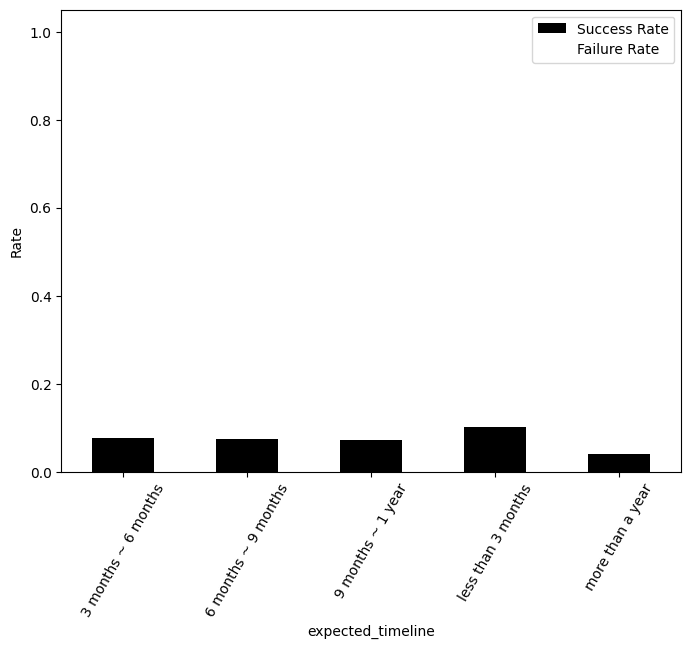

In [16]:
sales_success = df_train[df_train['is_converted'] == True].groupby('expected_timeline')['is_converted'].count().sort_values(ascending=False)

top_5 = df_train[df_train['expected_timeline'].isin(sales_success.head(5).index)]

success_failure = top_5.groupby(['expected_timeline', 'is_converted']).size().unstack(fill_value=0)
success_failure['Total'] = success_failure[True] + success_failure[False]
success_failure['Success Rate'] = success_failure[True] / success_failure['Total']
success_failure['Failure Rate'] = success_failure[False] / success_failure['Total']

success_failure[['Success Rate', 'Failure Rate']].plot(kind='bar', stacked=True, figsize=(8, 6), color=['black', 'white'])
plt.xlabel('expected_timeline')
plt.ylabel('Rate')
plt.xticks(rotation=60)
plt.legend()
plt.show()

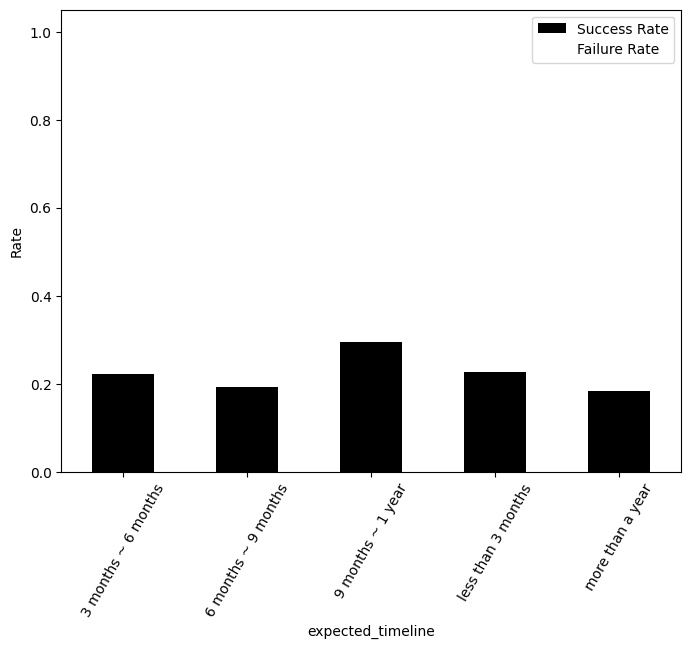

In [17]:
sales_success = df_test[df_test['is_converted'] == True].groupby('expected_timeline')['is_converted'].count().sort_values(ascending=False)

top_5 = df_test[df_test['expected_timeline'].isin(sales_success.head(5).index)]

success_failure = top_5.groupby(['expected_timeline', 'is_converted']).size().unstack(fill_value=0)
success_failure['Total'] = success_failure[True] + success_failure[False]
success_failure['Success Rate'] = success_failure[True] / success_failure['Total']
success_failure['Failure Rate'] = success_failure[False] / success_failure['Total']

success_failure[['Success Rate', 'Failure Rate']].plot(kind='bar', stacked=True, figsize=(8, 6), color=['black', 'white'])
plt.xlabel('expected_timeline')
plt.ylabel('Rate')
plt.xticks(rotation=60)
plt.legend()
plt.show()